# Compulsory Assignment 1 - Pandas and visualizations

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---
## Loading and exploring the dataset

__1. Load the dataset named `airbnb.csv` and store it in a dataframe called `raw_df`. Use the column named `ìd` as the index column for the dataframe__

In [2]:
# Insert your code below
# ======================

# Reading the csv file, and separating the columns from each other. The set_index sets the 
# id column as index for the dataframe. 

raw_df = pd.read_csv('airbnb.csv', sep=',').set_index('id')
# print(raw_df)

__2. Print the first `five` rows of the dataframe__

In [13]:
# Insert your code below
# ======================

print('First five rows: \n')
raw_df.head(5)

First five rows: 



,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,state,city
id,,,,,,,,,,,,,,,
183319,Panoramic Ocean View Venice Beach,867995,Barbara X,Venice,33.99211,-118.47600,Entire home/apt,152,30,3,2,0,0,CA,Los Angeles
109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,1,139,0,CA,Los Angeles
51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2,224,0,CA,Los Angeles
184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,1,0,0,CA,Los Angeles
51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,Mar Vista,34.00389,-118.44126,Entire home/apt,189,3,378,1,348,41,CA,Los Angeles


__3. How many unique values exist in each of the columns `state` and `city`?__

In [14]:
# Insert your code below
# ======================

# States and cities in its own dataframes. 
states = raw_df.state
cities = raw_df.city

# Printing the unique cities and states:
print(f'\nNumber of unique states: {states.nunique()}')
print(f'\nNumber of unique cities: {cities.nunique()}')


Number of unique states: 19

Number of unique cities: 31


__4. Identify missing (NaN) values in each of the columns in the dataset__

In [15]:
# Insert your code below
# ======================

# Isna finds all the NaN values in each column, and sum() gives us how many 
# there are in each column.
nan = raw_df.isna().sum()
print(nan)

name                                19
host_id                              0
host_name                         1144
neighbourhood                      712
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
state                                0
city                                 0
dtype: int64


__5. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values?__

In [31]:
# Insert your code below
# ======================

df = raw_df.copy().dropna() # Making a copy of raw_df using copy(), and removing the rows with NaN values using dropna().
print(f'Shape before: {raw_df.shape}. Shape after: {df.shape}')


Shape before: (325858, 15). Shape after: (323983, 15)


__6. Which `room_type`, `state` and `city` is the most popular (by number of instances)? Print the name and count of each__

Hint: The output should look something like this:
```python
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
```

In [17]:
# Insert your code below
# ======================

# Name of columns
col_room = df.columns[6]
col_state = df.columns[13]
col_city = df.columns[14]

# Dataframe with room_type. (The dataframes for state and city can be found in exercise 3.)
room_types = df.room_type

# The most frequent from each dataframe
most_frequent_roomtype = room_types.value_counts().index[0]
most_frequent_state = states.value_counts().index[0]
most_frequent_city = cities.value_counts().index[0]

# Counting how many times the most popular option is chosen
count_room = df['room_type'].value_counts()[most_frequent_roomtype]
count_state = df['state'].value_counts()[most_frequent_state]
count_city = df['city'].value_counts()[most_frequent_city]

# Printing the values
print(f'Column: {col_room}, Most popular: {most_frequent_roomtype}, Count: {count_room}')
print(f'Column: {col_state}, Most popular: {most_frequent_state}, Count: {count_state}')
print(f'Column: {col_city}, Most popular: {most_frequent_city}, Count: {count_city}')

Column: room_type, Most popular: Entire home/apt, Count: 241433
Column: state, Most popular: CA, Count: 127206
Column: city, Most popular: Los Angeles, Count: 91600


__7. What is the average and median `price` for a listing?__

In [18]:
# Insert your code below
# ======================

# Calculating the mean and median price for a listing. Used the built in functions for this in pandas. 

mean_price = raw_df['price'].mean()
median_price = raw_df['price'].median()

print(f'Mean price for a listing: {mean_price:.2f}')
print(f'Median price for a listing: {median_price:.2f}')

Mean price for a listing: 284.92
Median price for a listing: 159.00


__8. What is the average price for the states `CA`, `FL` and `NY`?__

Hint: The output should look something like this:
```python
State: [col], Average price: [price]
State: [col], Average price: [price]
State: [col], Average price: [price]
```

In [19]:
# Insert your code below
# ======================

states_list = ['CA', 'FL', 'NY']

# For-loop that goes through each item (state) in the list:
for state in states_list:
    state_df = raw_df[(raw_df['state'] == state)]    # Creates dataframe of containing all columns for one spesific state.
    df_reduce = state_df[['state', 'price']]         # Reducing the previous dataframe to only containing state and price. 
    average_price = df_reduce['price'].mean()        # Calculating the mean price. 
    print(f'State: {state}, Average price: {average_price:.2f}')


State: CA, Average price: 288.41
State: FL, Average price: 241.92
State: NY, Average price: 197.55


__9. Create a new dataframe called `df_beach` containing all listings with "beach" in the `name`. Print out the shape of `beach_df`__

The filtering should not be case sensitive, meaning that names containing `beach`, `Beach`, `BeAcH` etc. all should be included


In [20]:
# Insert your code below
# ======================

# Creating dataframe with all listings containing beach. Setting case=False makes it not case-sensitive. 

df_beach = raw_df.loc[raw_df['name'].str.contains('beach', na=False, case=False)]
print(f'Shape of df_beach: {df_beach.shape}')


Shape of df_beach: (31521, 15)


---

## Visualizing the dataset

__10. Create plot with 2 vertical axes and one horizontal axes. The plot should display a barchart containing the `count` of the `10 most popular` states and cities, each in its own subplot. The bars should be sorted in descending order.__

Use `df` in all tasks in this section

Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/ex10.png"
     alt="Barchart example"/>

PS: Disregard the color scheme of the example image.

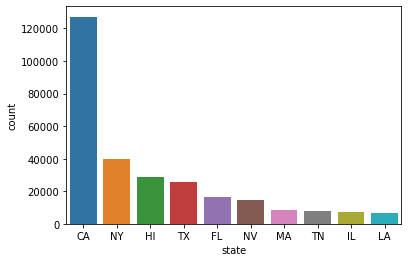

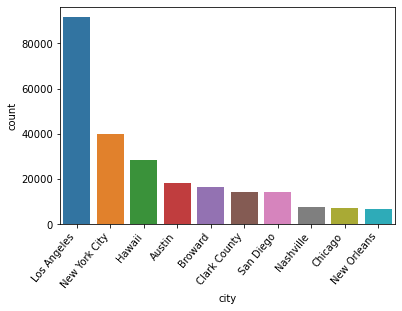

In [21]:
# Insert your code below
# ======================

# Dataframes for top 10 popular states and cities.
popstates_df = df.state.value_counts().head(10).index
popcities_df = df.city.value_counts().head(10).index

# Histogram for the top 10 popular states. 
states_hist = sns.countplot(data=df, x='state', order=popstates_df)
plt.figure()

# Histogram for the top 10 popular cities. 
cities_hist = sns.countplot(data=df, x='city', order=popcities_df)
cities_hist.set_xticklabels(cities_hist.get_xticklabels(), rotation=50, ha='right') # Rotating the labels so it's readable.
plt.show()


__11. Create a scatterplot with the longitude and latitude of the listings in `df`. Longitude should be on the x-axis and latitude on the y-axis.__ 

The output should look something like this:

<img src="assets/ex11.png"
     alt="Scatterplot example"/>

PS: Disregard the color scheme of the example image.

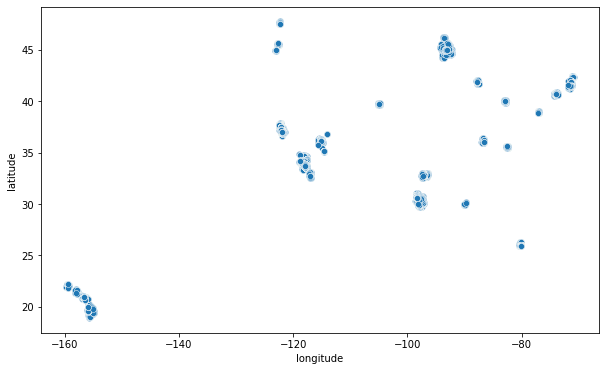

In [33]:
# Insert your code below
# ======================

# Scatterplot based on longitude and latitude using seaborn. 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude')
plt.show()

__12. Create a matrix containing the correlations between the different columns in `df`. Plot it as a heatmap using Seaborn or similar. What does the plot tell you about correlations? Which columns are the most correlated to `price`?__

Text(0.5, 1.0, 'Correlation Heatmap')

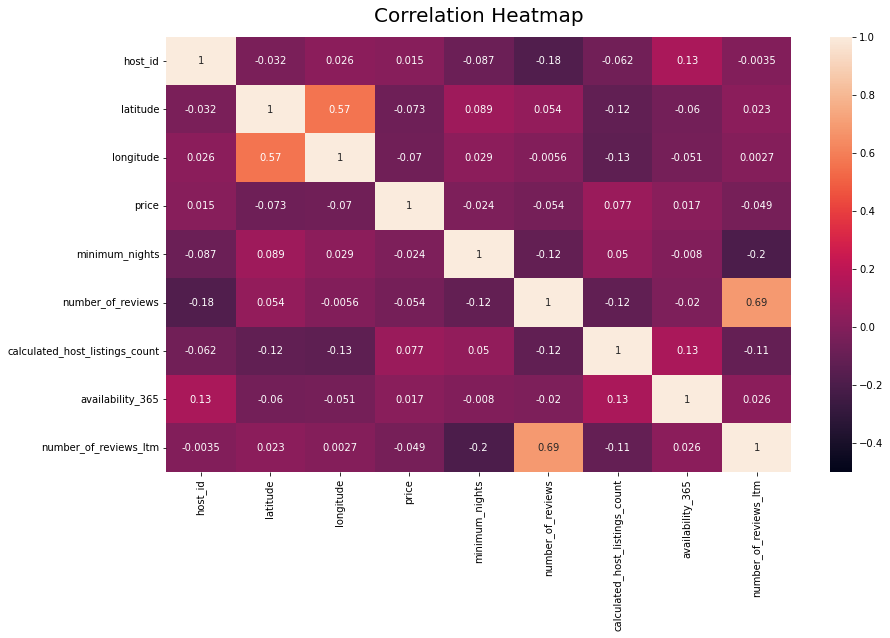

In [23]:
# Insert your code below
# ======================

# Correlation heatmap using seaborn. 

plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(data=df.corr(), vmin=-0.5, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15)

Based on the correlation heatmap, the number_of_reviews and number_of_review_ltm are highly correlated. The ones that are the most correlated to the price is calculated_host_listnings_count. 